In [1]:
import pandas as pd
import seaborn as sns


C:\Users\Bear\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
raw_data = pd.read_csv('data_2023_08_24.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4790 entries, 0 to 4789
Data columns (total 84 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          4790 non-null   object 
 1   btc_mktcap                    4790 non-null   float64
 2   btc_volume                    4790 non-null   float64
 3   btc_last                      4790 non-null   float64
 4   btc_day_range                 4790 non-null   float64
 5   btc_unnecessary_day_movement  4790 non-null   float64
 6   btc_dist_from_52whigh         4787 non-null   float64
 7   btc_dist_from_52wlow          4787 non-null   float64
 8   btc_rtns                      4790 non-null   float64
 9   btc_21d_rtns                  4770 non-null   float64
 10  btc_63d_rtns                  4728 non-null   float64
 11  btc_252d_rtns                 4539 non-null   float64
 12  btc_vol_21d                   4771 non-null   float64
 13  btc

# 1.0 Examining our target variable that we are interested to forecast

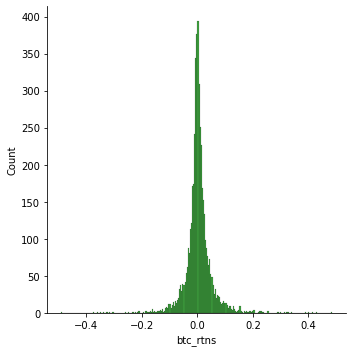

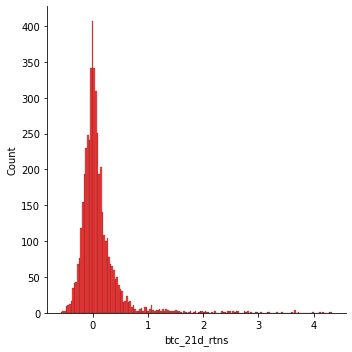

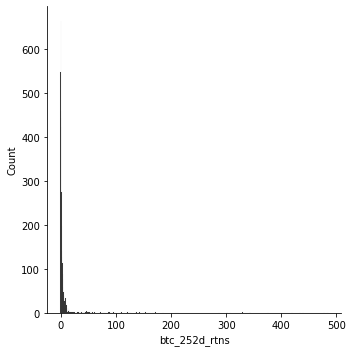

In [3]:
sns.displot(data=raw_data, x='btc_rtns',color='green')
sns.displot(data=raw_data, x='btc_21d_rtns',color='red')
sns.displot(data=raw_data, x='btc_252d_rtns',color='black')

<b>Comments: </b> In general, returns are very dispersed/high kurtosis with much outliars. As holding period increases, returns tend to be very right skewed

# 2.0 Examining predictor variables for BTC forecasting

## 2.1 Bitcoin related variables - Returns & Risk

| Variable Name | Source | Hypothesized relation | Suggested Result from plots below|
| --- | --- | --- | --- |
| <b>n14days_rtns</b> | Coinmarketcap API, simple future period return | variable of interest for forecasting | |
| btc_21d_rtns,btc_63d_rtns,btc_252d_rtns | Coinmarketcap API, simple historical period return | (+) BTC is a very trending asset class in an inefficient market | <b>Supported</b> |
| btc_vol_21d,btc_vol_63d,btc_vol_252d | Coinmarketcap API, simple historical sd of returns | (-) When there is more returns uncertainty, investors will sell assets to avoid risk | <b>Supported</b> |
| unstable_sign_change | Coinmarketcap API, % of days over 60 days where sign(RTN)!=sign(RTN,T-1) | (-) When there is more returns uncertainty, investors will sell assets to avoid risk | <b>Supported</b> |
| btc_unnecessary_day_movement | Coinmarketcap API, (high-low) - abs(open-close) | (-) When there is more returns uncertainty intraday, investors will sell assets to avoid risk | Opposite |
| btc_options_put_call_vol,btc_options_put_call_trade | https://cryptorank.io/derivatives-analytics/options/bitcoin, data starts 2022 | (+) When there is put/call pressure, reversal is expected | <b>Supported</b> |
| btc_volume_chg_30d_avg | coinmarket cap,trade vol | Useful variable to combine with other indicators |  |
| btc_60d_skew  | coinmarketcap API, simple skewness| (+) The more right-skewed the returns are, the more lottery-like and the more attraction to retail | <b>Supported</b> |
| btc_60d_kurt  | coinmarketcap API, simple kurtosis| (+) The more skewed the returns are, the more lottery-like and the more attraction to retail | <b>Supported</b> |


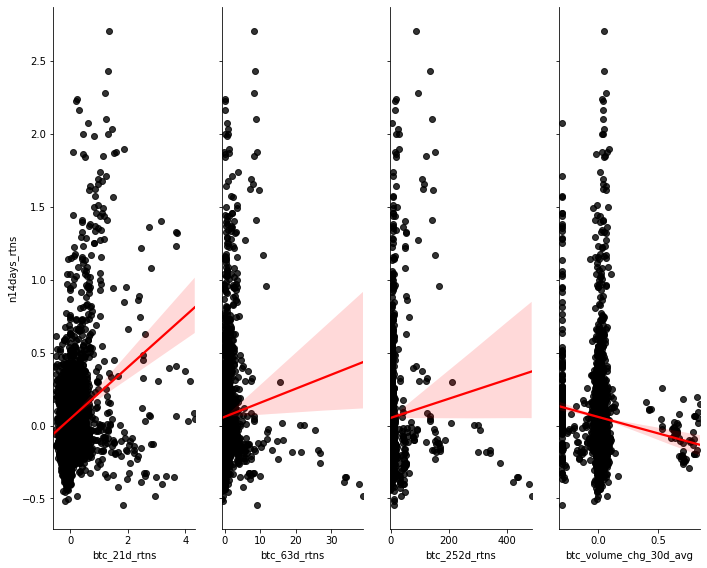

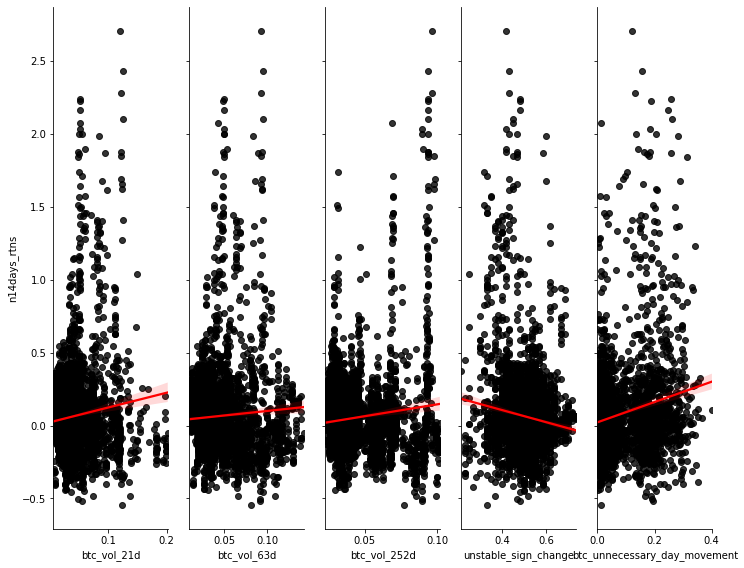

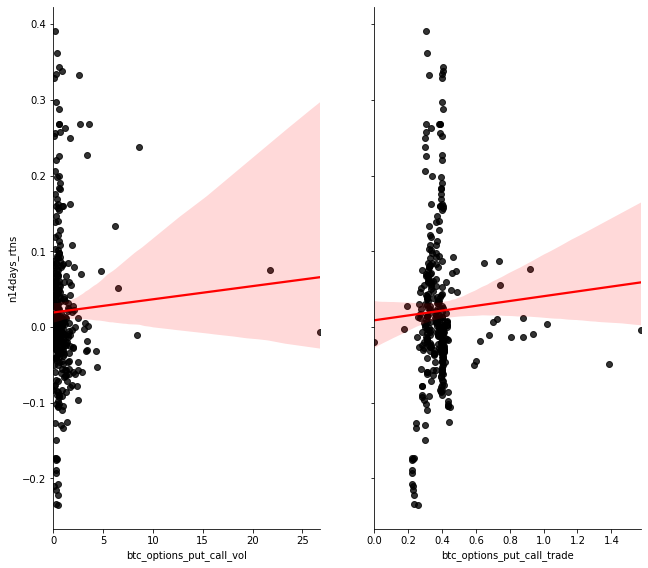

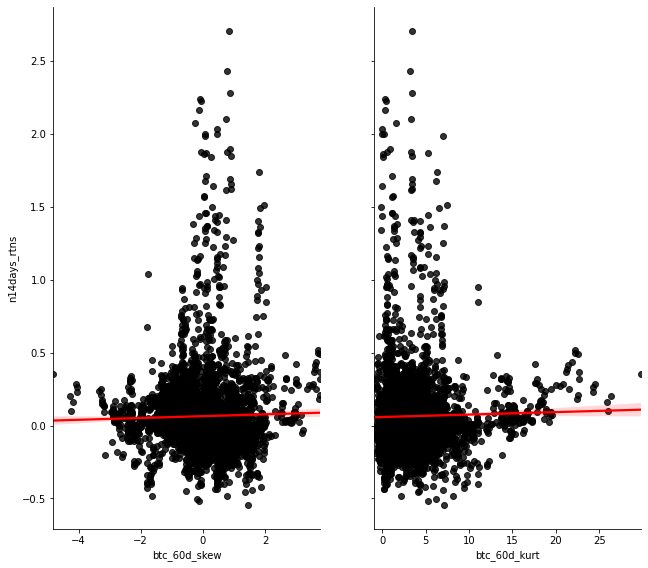

In [4]:
g = sns.PairGrid(raw_data,x_vars=['btc_21d_rtns','btc_63d_rtns','btc_252d_rtns','btc_volume_chg_30d_avg'],y_vars=['n14days_rtns'])
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})

g = sns.PairGrid(raw_data,x_vars=['btc_vol_21d','btc_vol_63d','btc_vol_252d','unstable_sign_change','btc_unnecessary_day_movement'],y_vars=['n14days_rtns'])
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})

g = sns.PairGrid(raw_data,x_vars=['btc_options_put_call_vol','btc_options_put_call_trade'],y_vars=['n14days_rtns'])
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})

g = sns.PairGrid(raw_data,x_vars=['btc_60d_skew','btc_60d_kurt'],y_vars=['n14days_rtns'])
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})


## 2.2 Bitcoin related variables - Blockchain related variables

| Variable Name | Source | Hypothesized relation | Suggested Result from plots below|
| --- | --- | --- | --- |
| btc_fee | coinmetrics.io | (-) When fee increases, friction cost increases and it is less desireable to hold BTC | <b>Supported</b> |
| btc_active_address | bitinfocharts.com | (+) the more utilize the network, the better network effect, and more valuable BTC is | Opposite |
| miner_profit_per1Thash |  bitinfocharts.com| (+) When profitability increases, bitcoin miners are in shortage indicating BTC supply shortage and hence good for prices | <b>Supported</b> |
|hashrate_5d_CHG |blockchain.info| (+) When hashrate increases, the more secure the network, and more desireable the BTC is.  | <b>Supported</b> |
|hashrate_21d_CHG|blockchain.info| (+) When hashrate increases, the more secure the network, and more desireable the BTC is. | <b>Supported</b> |
|hashrate_63d_CHG|blockchain.info| (+) When hashrate increases, the more secure the network, and more desireable the BTC is. | <b>Supported</b> |
|btc_trade_val_5d_CHG |blockchain.info| (+) When trading value increases, the more liquid the BTC market is and the more desireable the BTC is as an asset class.  | <b>Supported</b> |
|btc_trade_val_21d_CHG|blockchain.info| (+)  When trading value increases, the more liquid the BTC market is and the more desireable the BTC is as an asset class. | <b>Supported</b> |
|btc_trade_val_63d_CHG|blockchain.info| (+)  When trading value increases, the more liquid the BTC market is and the more desireable the BTC is as an asset class. | <b>Supported</b> |

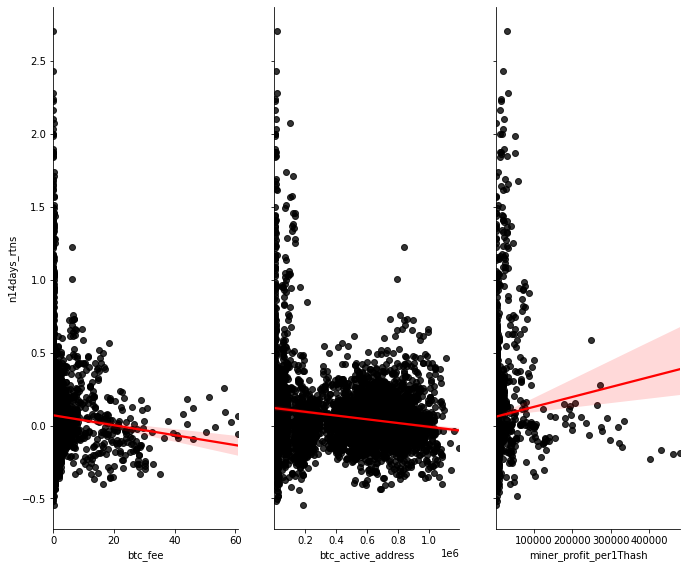

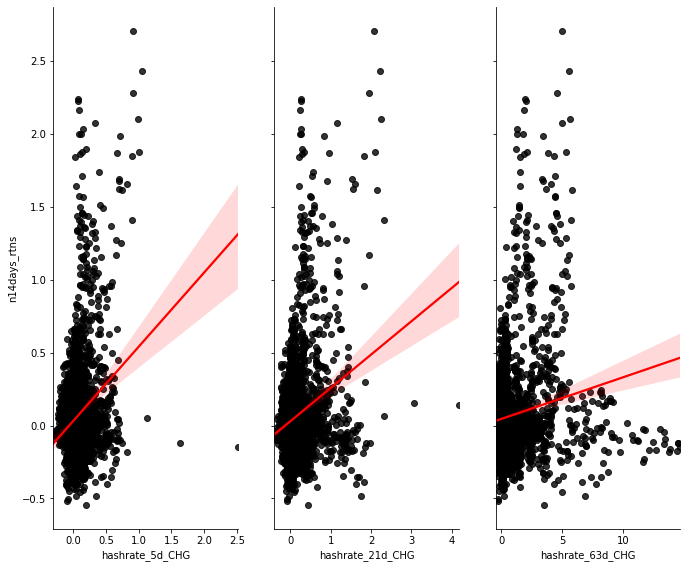

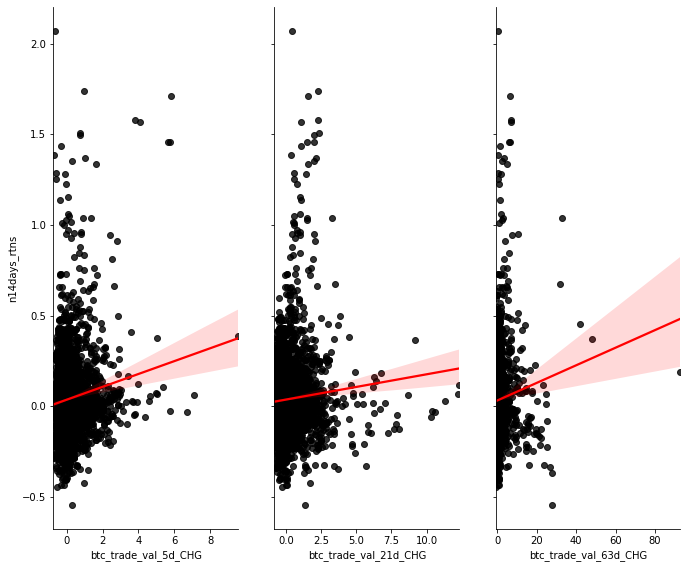

In [5]:


g = sns.PairGrid(raw_data,x_vars=['btc_fee','btc_active_address','miner_profit_per1Thash'],y_vars=['n14days_rtns'])
#Exclude hashrate , not stationary variable
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})

g = sns.PairGrid(raw_data,x_vars=['hashrate_5d_CHG','hashrate_21d_CHG','hashrate_63d_CHG'],y_vars=['n14days_rtns'])
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})

g = sns.PairGrid(raw_data,x_vars=['btc_trade_val_5d_CHG','btc_trade_val_21d_CHG','btc_trade_val_63d_CHG'],y_vars=['n14days_rtns'])
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})



## 2.3 Obvious cross-market drivers of BTC returns 

| Variable Name | Source | Hypothesized relation | Suggested Result from plots below|
| --- | --- | --- | --- |
| US_FX_DXY_10D | Yahoo Finance FX DXY | (-) The more valuable USD is, the less USD to buy bitcoin | <b>Supported</b> |
| US_FX_DXY_21D | Yahoo Finance FX DXY | (-) The more valuable USD is, the less USD to buy bitcoin | <b>Supported</b> |
| US_FX_DXY_63D | Yahoo Finance FX DXY | (-) The more valuable USD is, the less USD to buy bitcoin | <b>Supported</b> |
| VIX | Yahoo Finance SP500 3-months VIX | (-) The more volatile equity market is, the lower the risk appetite for bitcoin due to risk-off | <b>Supported</b> |
| cboe_putcall_ratio_10davg | Yahoo Finance FX DXY | (+) The more shorted the equity market is , the more it will reverse. Reversal also signals start of risk-on | No Result |
| SPX_RTN_5D,SPX_RTN_21D,SPX_RTN_63D | stooq.com, simple period return | (+) The more risk-on equity market is, the more risk-on benefiting BTC | <b>Supported</b> |
| GLD_RTN_5D,GLD_RTN_21D,GLD_RTN_63D | stooq.com, simple period return | (+) The same driver of gold will drive BTC which is the digital gold | <b>Weakly Supported</b> |

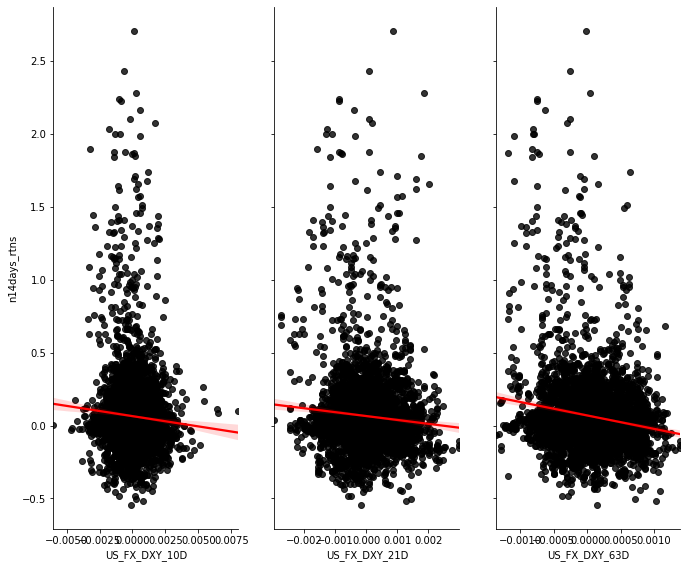

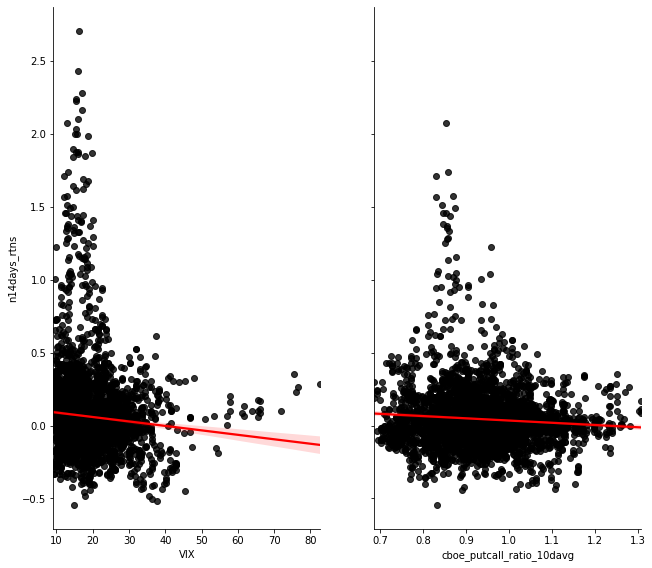

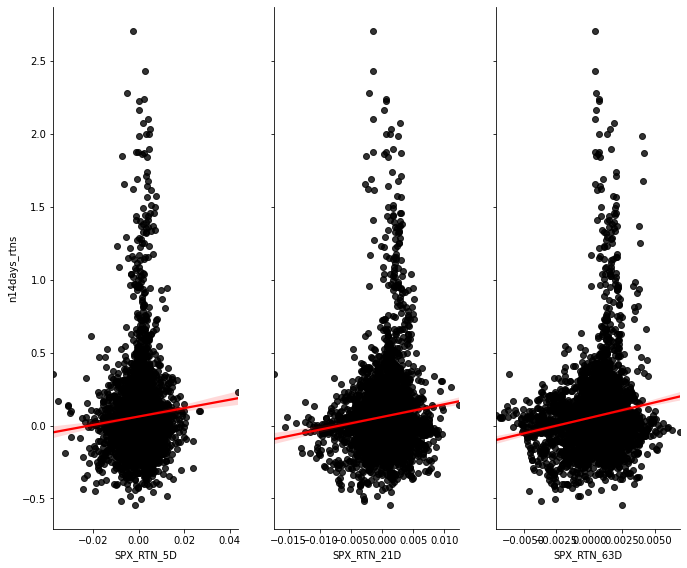

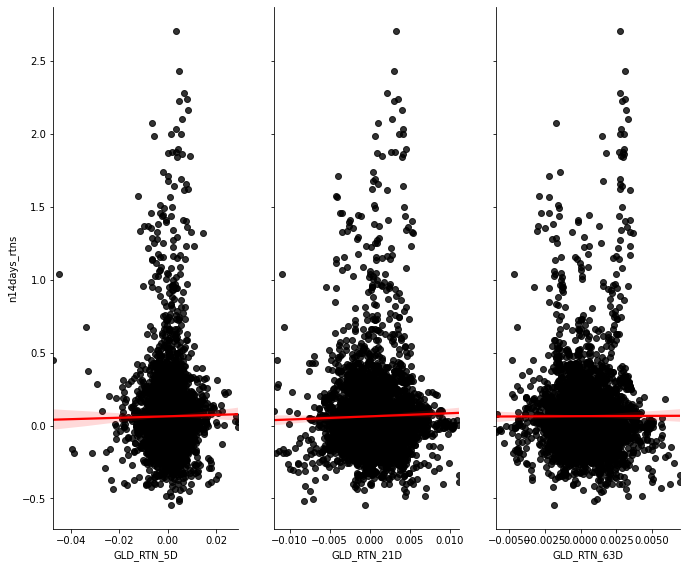

In [6]:
g = sns.PairGrid(raw_data,x_vars=['US_FX_DXY_10D','US_FX_DXY_21D','US_FX_DXY_63D'],y_vars=['n14days_rtns'])
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})

g = sns.PairGrid(raw_data,x_vars=['VIX','cboe_putcall_ratio_10davg'],y_vars=['n14days_rtns'])
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})

g = sns.PairGrid(raw_data,x_vars=['SPX_RTN_5D','SPX_RTN_21D','SPX_RTN_63D'],y_vars=['n14days_rtns'])
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})

g = sns.PairGrid(raw_data,x_vars=['GLD_RTN_5D','GLD_RTN_21D','GLD_RTN_63D'],y_vars=['n14days_rtns'])
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})







## 2.4 Economic, Inflation and interest rate varibles for BTC returns 

| Variable Name | Source | Hypothesized relation | Suggested Result from plots below|
| --- | --- | --- | --- |
| ry_5y_10d_CHG,ry_5y_21d_CHG,ry_5y_63d_CHG | treasury.gov, 5 years real yield change | (-) The higher the real yield the less attractive for non-interest bearing BTC| <b>Supported</b> |
| ry_7y_10d_CHG,ry_7y_21d_CHG,ry_7y_63d_CHG | treasury.gov, 7 years real yield change | (-) The higher the real yield the less attractive for non-interest bearing BTC| <b>Supported</b> |
| ry_10y_10d_CHG,ry_10y_21d_CHG,ry_10y_63d_CHG | treasury.gov, 10 years real yield change | (-) The higher the real yield the less attractive for non-interest bearing BTC| <b>Supported</b> |
| ry_20y_10d_CHG,ry_20y_21d_CHG,ry_20y_63d_CHG | treasury.gov, 20 years real yield change | (-) The higher the real yield the less attractive for non-interest bearing BTC| <b>Supported</b> | |ry_30y_10d_CHG,ry_30y_21d_CHG,ry_30y_63d_CHG | treasury.gov, 30 years real yield change | (-) The higher the real yield the less attractive for non-interest bearing BTC| <b>Supported</b> |
| US_PMI | stooq | (+) Strength of US economy. The more positive, the more risk-on behaviours | Not Supported |
| CN_PMI | stooq | (+) Strength of China economy. The more positive, the more risk-on behaviours and china is the second biggest holder of BTC. See: https://worldpopulationreview.com/country-rankings/bitcoin-ownership-by-country | <b>Supported</b> |
| US_CPI_YOY | stooq US headline inflation YoY | (+) The higher the inflation ,the more attractive BTC is as inflation hedge | Opposite |
| T10YIE | fred.stlouisfed.org | (-) The higher the real interest rate as implied by TIPS market, the less attractive BTC is as non-interest bearing asset | <b>Supported</b> |
| RealGDPNowcastChgPrevious | Atlanta GDP Nowcast | (+) The more positive the nowcast, the stronger the economy and the more appetiate for BTC| <b>Weakly Supported</b> |


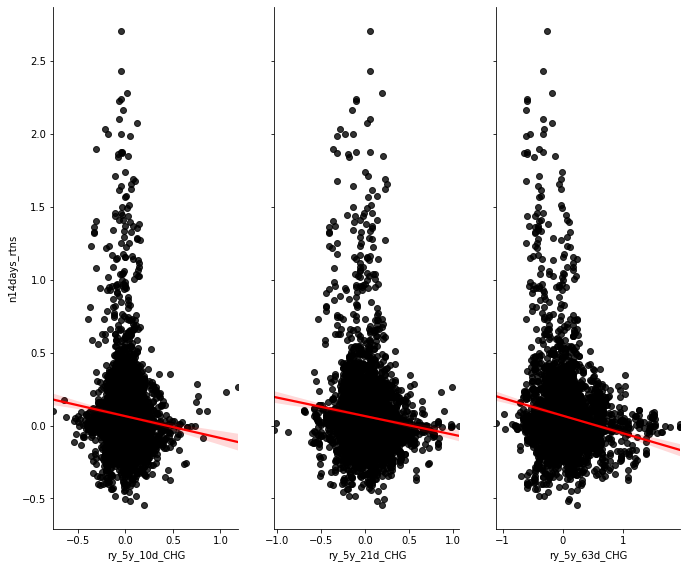

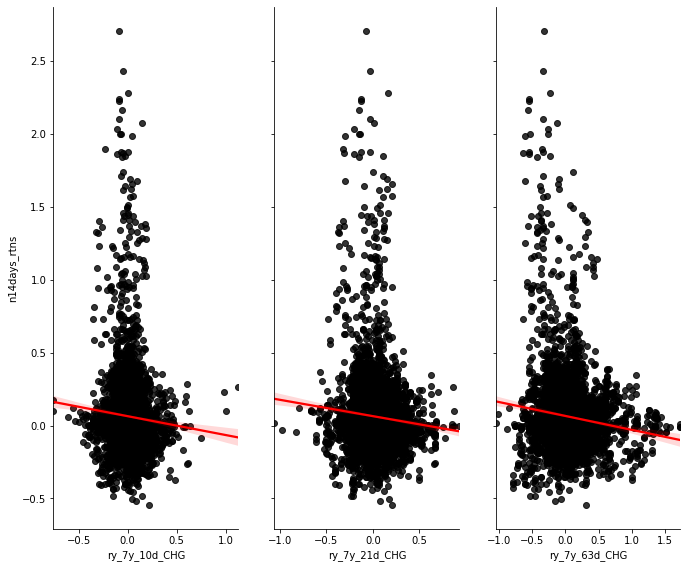

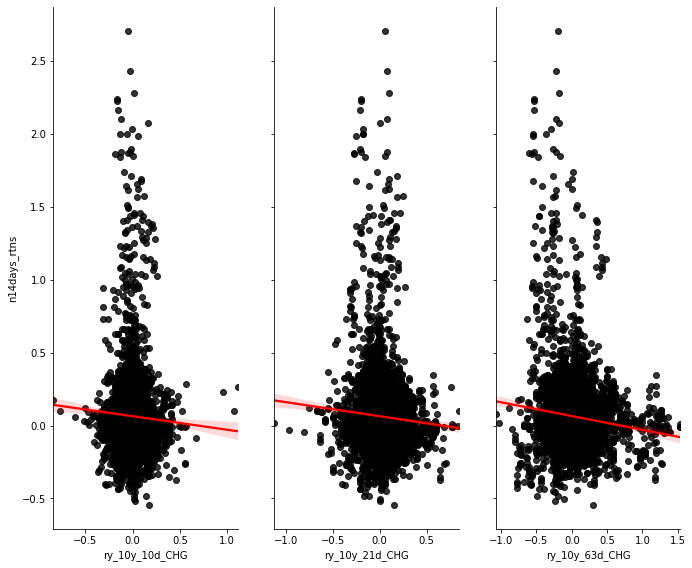

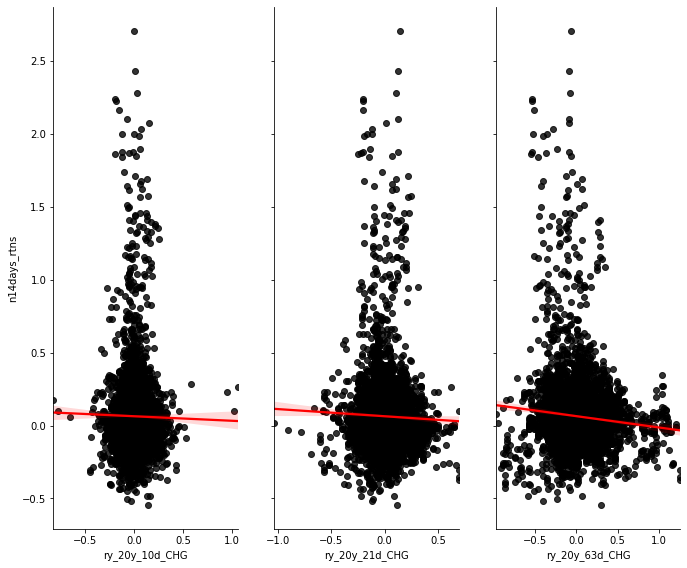

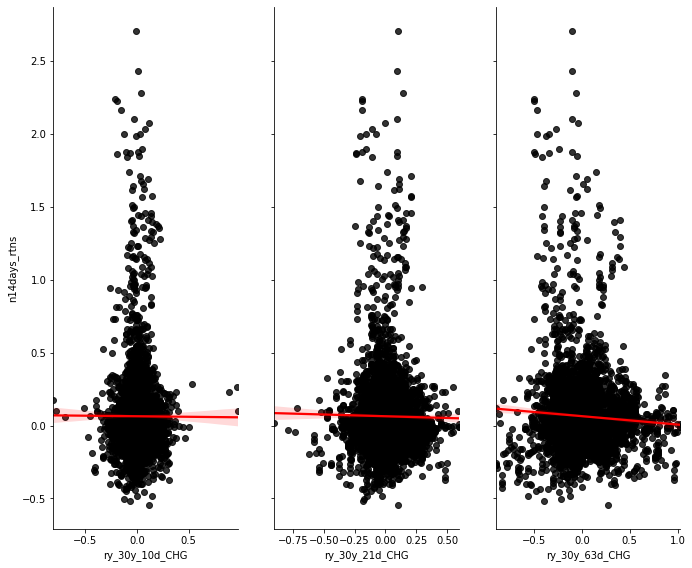

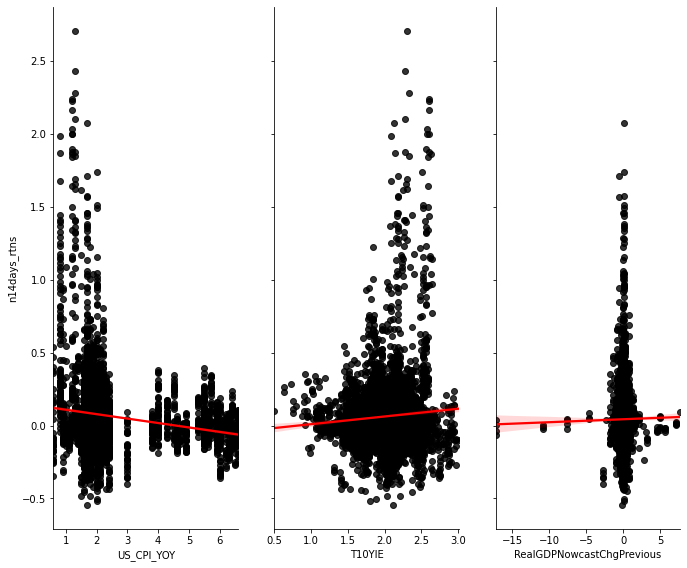

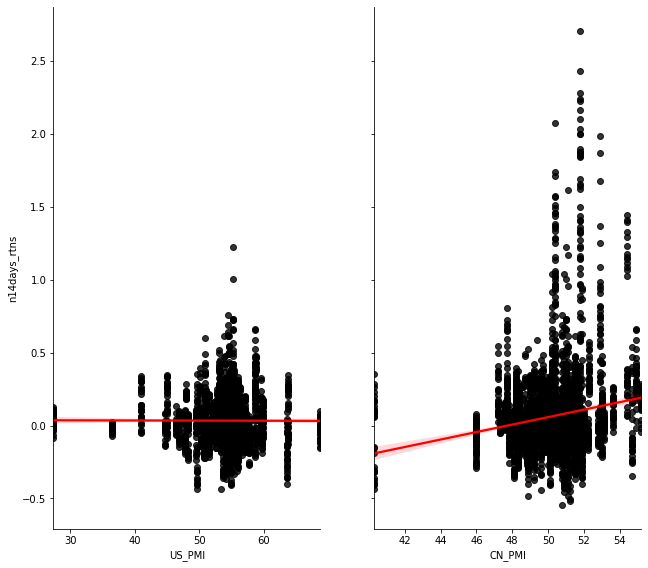

In [7]:
g = sns.PairGrid(raw_data,x_vars=['ry_5y_10d_CHG','ry_5y_21d_CHG','ry_5y_63d_CHG'],y_vars=['n14days_rtns'])
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})

g = sns.PairGrid(raw_data,x_vars=['ry_7y_10d_CHG','ry_7y_21d_CHG','ry_7y_63d_CHG'],y_vars=['n14days_rtns'])
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})

g = sns.PairGrid(raw_data,x_vars=['ry_10y_10d_CHG','ry_10y_21d_CHG','ry_10y_63d_CHG'],y_vars=['n14days_rtns'])
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})

g = sns.PairGrid(raw_data,x_vars=['ry_20y_10d_CHG','ry_20y_21d_CHG','ry_20y_63d_CHG'],y_vars=['n14days_rtns'])
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})

g = sns.PairGrid(raw_data,x_vars=['ry_30y_10d_CHG','ry_30y_21d_CHG','ry_30y_63d_CHG'],y_vars=['n14days_rtns'])
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})

g = sns.PairGrid(raw_data,x_vars=['US_CPI_YOY','T10YIE','RealGDPNowcastChgPrevious'],y_vars=['n14days_rtns'])
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})

g = sns.PairGrid(raw_data,x_vars=['US_PMI','CN_PMI'],y_vars=['n14days_rtns'])
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})


## 2.4 Google Trend Relationship to BTC

| Variable Name | Source | Hypothesized relation | Suggested Result from plots below|
| --- | --- | --- | --- |
| gtrend_chg_5D,gtrend_chg_21D,gtrend_chg_63D | Google Trend | Proxy for retail interest. higher search means increasing popularity| <b>Supported</b> |


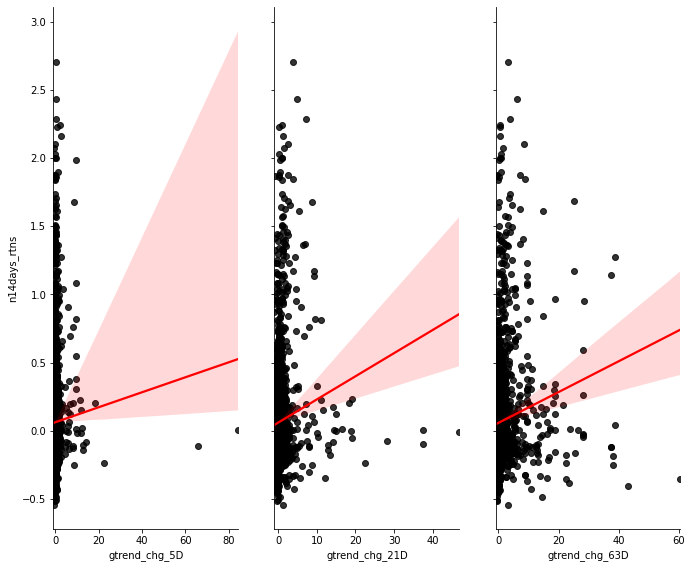

In [8]:
g = sns.PairGrid(raw_data,x_vars=['gtrend_chg_5D','gtrend_chg_21D','gtrend_chg_63D'],y_vars=['n14days_rtns'])
g.fig.set_size_inches(10,10)
g.map(sns.regplot,scatter_kws={"color": "black"}, line_kws={"color": "red"})
